**Capstone: Supervised learning**

You're ready to put into practice everything that you've learned so far. Here are the next steps for your capstone:

1- Go out and find a dataset of interest. It could be from one of the recommended resources or some other aggregation. Or it could be something that you scraped yourself. Just make sure that it has lots of variables, including an outcome of interest to you.

2- Explore the data. Get to know the data. Spend a lot of time going over its quirks. You should understand how it was gathered, what's in it, and what the variables look like.

3- Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power, and experiment with both.



In [ ]:
#Find Dataset 

#Telco Customer Churn dataset provided by IBM to study the customer behavior

Dataset from Kaggle:

https://www.kaggle.com/dheerajetx/telecom#WA_Fn-UseC_-Telco-Customer-Churn.xlsx

Explore Phase next after import

In [ ]:
#google colab provided code to import
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv
User uploaded file "WA_Fn-UseC_-Telco-Customer-Churn.csv" with length 977499 bytes


Goals:

Use models to predict if a customer will discontinue services (Target Values-Churn Yes and No)

Find best variables 

Work with data


In [ ]:
# Data science environment.
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy 
from collections import Counter
from scipy import stats
from scipy.stats import ttest_ind
import time 
import random
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn import svm
from sklearn import ensemble
from sklearn import linear_model
from sklearn import model_selection
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from IPython.display import display
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from IPython.display import Image
import pydotplus
import graphviz
# Display preferences.
%matplotlib inline

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
c_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=[" "])

In [ ]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
c_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
c_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Converting Yes and NO
#Change senior citizen

In [ ]:
c_df['SeniorCitizen'] = pd.Categorical(c_df['SeniorCitizen']) 
#Changing from int to categorical
c_df.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [ ]:
#reviewing if I should delete Customer ID
del c_df["customerID"] 

In [ ]:
#dropping any nulls

c_df = c_df.dropna()

In [ ]:
# 'TotalCharges' column, space (' ') was present as a value.
total_charges_zero = c_df[c_df['TotalCharges'] == ' ']
total_charges_zero

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# Replace empty cells (' ') with '0'.
c_df['TotalCharges'] = c_df['TotalCharges'].replace(' ', '0')

In [ ]:
#change d type from obj to float
c_df['TotalCharges'] = c_df['TotalCharges'].astype('float')

In [ ]:
c_df.shape

(7032, 20)

In [ ]:
#variable analysis (data exploration)
numerics = ['float64', 'int64']
numeric_df = c_df.select_dtypes(include=numerics)
objects_df = c_df.select_dtypes(exclude=numerics)

In [ ]:
#how data looks so far 

numeric_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [ ]:
objects_df.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
#graphical visualization with
#Numerical
#Categorical
#Numerical vs Categorical



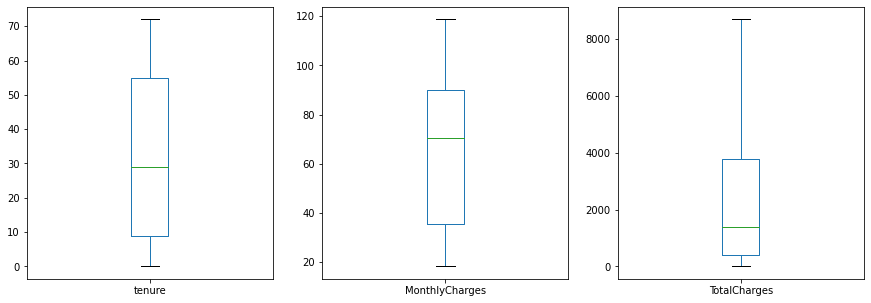

In [ ]:
#box plots
numeric_df.plot(kind='box', subplots=True, figsize=(15,5))
plt.plot()
plt.show()

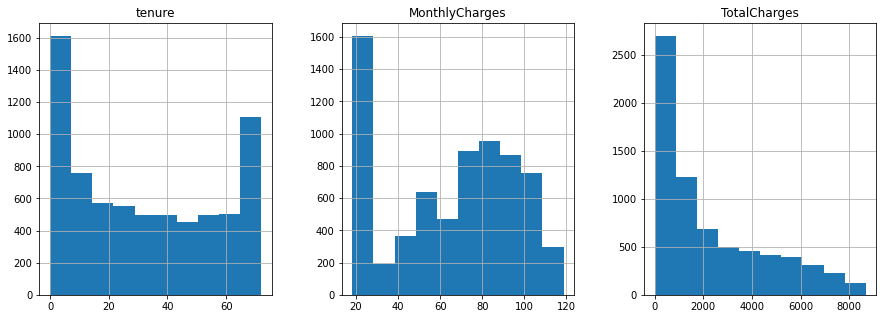

In [ ]:
#histogram plots
numeric_df.hist(layout=(1,3), figsize=(15,5))
plt.plot()
plt.show()

In [ ]:
#The box plot and histogram shows us that our numerical features are not normally distributed.
#With a pair grid graph we can see how these feature relate to the feature we are trying to predict, churn.

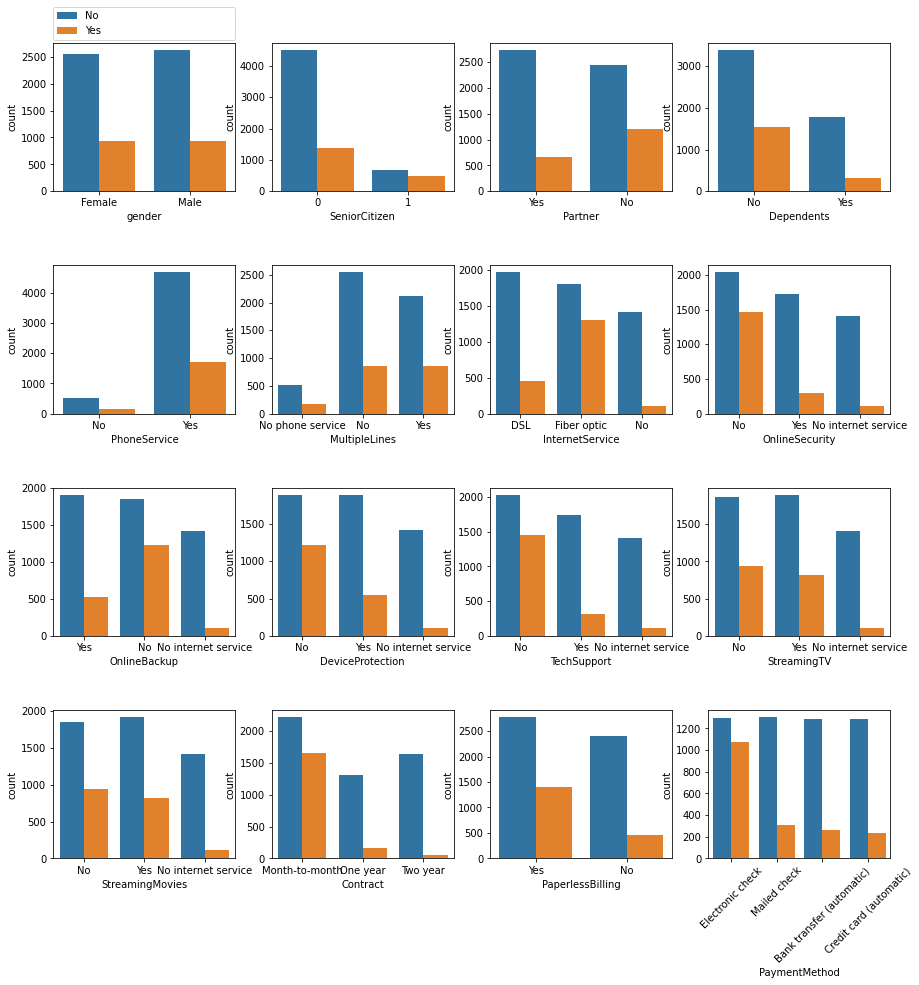

In [ ]:
#Categorical plots
#showing relationship bewtween variables

fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_df.iloc[:,i], hue=objects_df["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

In [ ]:
objects_df.loc[:, "Churn_yes"] = objects_df.Churn.apply(lambda r: 1 if r == "Yes" else 0)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

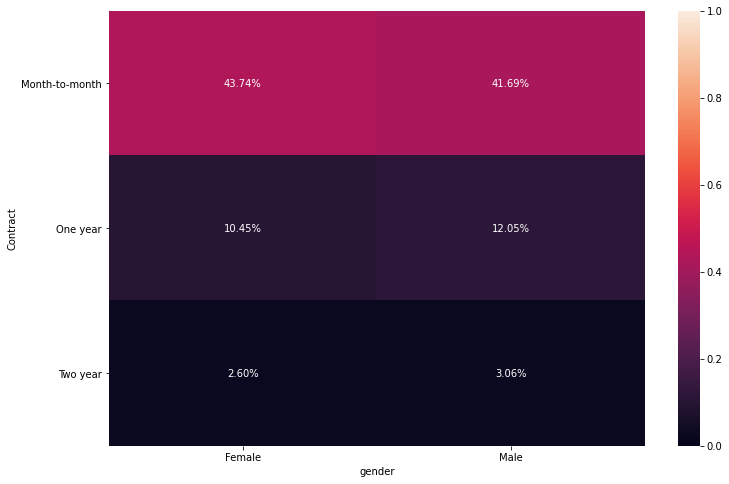

In [ ]:
contract = objects_df.pivot_table(values= "Churn_yes" , columns="gender", index='Contract')
plt.figure(figsize = (12,8))
#sns.set(rc={'figure.facecolor':'#757575ff'}, font_scale=1.5)
sns.heatmap(contract, annot=True, fmt="0.2%", vmin=0, vmax=1)
plt.yticks(rotation=0)

In [ ]:
#Month to Month Contracts have a hight churn rate

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

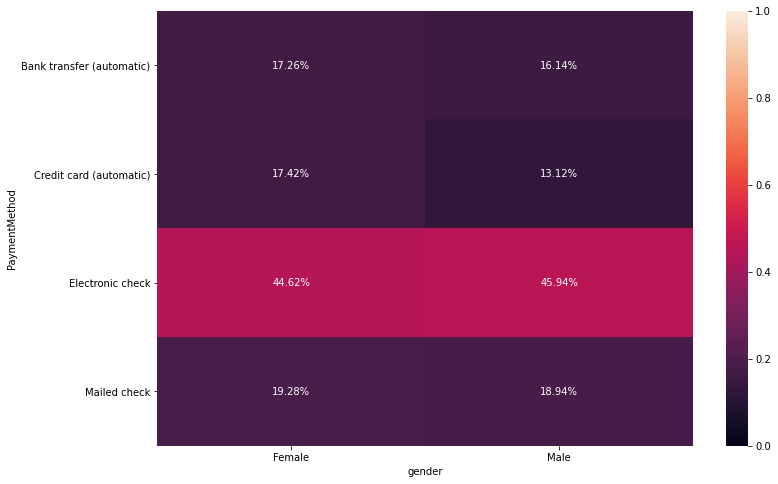

In [ ]:
payment_method = objects_df.pivot_table(values= "Churn_yes" , columns="gender", index='PaymentMethod')
plt.figure(figsize = (12,8))
#sns.set(rc={'figure.facecolor':'#757575ff'}, font_scale=1.5)
sns.heatmap(payment_method, annot=True, fmt="0.2%", vmin=0, vmax=1)
plt.yticks(rotation=0)

In [ ]:
#Having Month-to-month contract is a strong indicator if the client will churn
#If the client has an Electronic check payment method this is also an indicator that the client might churn as well

In [ ]:
#Tenure 
#Monthly Charges 
#look like good features that can help us in our prediction.

In [ ]:
# Convert 'yes'/'no' values to '1'/'0'.
c_df['Partner'] = c_df['Partner'].apply(lambda x: 0 if x == 'No' else 1)
c_df['Dependents'] = c_df['Dependents'].apply(
    lambda x: 0 if x == 'No' else 1)
c_df['PhoneService'] = c_df['PhoneService'].apply(
    lambda x: 0 if x == 'No' else 1)
c_df['PaperlessBilling'] = c_df['PaperlessBilling'].apply(
    lambda x: 0 if x == 'No' else 1)
c_df['Churn'] = c_df['Churn'].apply(lambda x: 0 if x == 'No' else 1)

# Convert 'yes'/'no'/'no service' values to '1'/'0'/'0'
# (since 'no service' is the same as 'no').
c_df['MultipleLines'].replace(('No phone service', 'No', 'Yes'), (0, 0, 1),
                               inplace=True)
c_df['OnlineSecurity'].replace(('No', 'Yes', 'No internet service'),
                                (0, 1, 0), inplace=True)
c_df['OnlineBackup'].replace(('Yes', 'No', 'No internet service'),
                              (1, 0, 0), inplace=True)
c_df['DeviceProtection'].replace(('No', 'Yes', 'No internet service'),
                                  (0, 1, 0), inplace=True)
c_df['TechSupport'].replace(('No', 'Yes', 'No internet service'), (0, 1, 0),
                             inplace=True)
c_df['StreamingTV'].replace(('No', 'Yes', 'No internet service'), (0, 1, 0),
                             inplace=True)
c_df['StreamingMovies'].replace(('No', 'Yes', 'No internet service'),
                                 (0, 1, 0), inplace=True)

# Covert 'DSL'/'Fiber optic'/'No' to '1'/'2'/'0' since fiber optic is fastest.
c_df['InternetService'].replace(('DSL', 'Fiber optic', 'No'), (1, 2, 0),
                                 inplace=True)

# Convert to number of years.
c_df['Contract'].replace(('Month-to-month', 'One year', 'Two year'),
                          (0, 1, 2), inplace=True)

# Convert 'male'/'female' to '1'/'0'.
c_df['gender'].replace(('Female', 'Male'), (0, 1), inplace=True)

c_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1


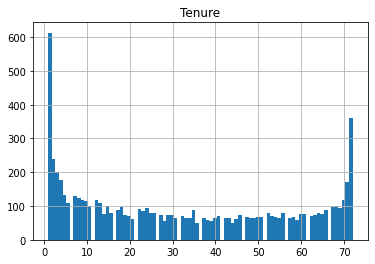

Median  29.0
Std  24.545259709263192
Outliers above  78.09051941852638


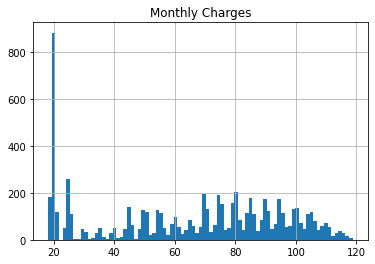

Median  70.35
Std  30.08597388404983
Outliers above  130.52194776809966  and below  10.178052231900331


In [ ]:
#Outliers

# Check for outliers, central tendencies.
c_df['tenure'].hist(bins=85)
plt.title('Tenure')
plt.show()

median = c_df['tenure'].median()
std = c_df['tenure'].std()
pop_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', pop_out)


c_df['MonthlyCharges'].hist(bins=85)
plt.title('Monthly Charges')
plt.show()

median = c_df['MonthlyCharges'].median()
std = c_df['MonthlyCharges'].std()
pop_out1 = median + 2 * std
pop_out2 = median - 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', pop_out1, ' and below ', pop_out2)

In [ ]:
#get dummies 

#create dummy variables for remaining categorical data.
d_df = pd.get_dummies(c_df['PaymentMethod'])

# Merge dataframes together.
churn_dum = c_df.merge(d_df, left_index=True, right_index=True)

# Drop 'PaymentMethod' column.
churn_dum.drop(['PaymentMethod'], axis=1)

churn_dum.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,Mailed check,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1,0,0,1,0


In [ ]:
#data types.
churn_dum.dtypes

gender                          int64
SeniorCitizen                category
Partner                         int64
Dependents                      int64
tenure                          int64
PhoneService                    int64
MultipleLines                   int64
InternetService                 int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
Contract                        int64
PaperlessBilling                int64
PaymentMethod                  object
MonthlyCharges                float64
TotalCharges                  float64
Churn                           int64
Bank transfer (automatic)       uint8
Credit card (automatic)         uint8
Electronic check                uint8
Mailed check                    uint8
dtype: object

In [ ]:
# Change dtypes from 'uint8' to 'int64'.
cols_to_include = ['Bank transfer (automatic)', 'Credit card (automatic)',
                   'Electronic check', 'Mailed check']
for col in churn_dum.columns:
    if churn_dum[col].nunique() < 10 and col in cols_to_include:
        churn_dum[col] = churn_dum[col].astype('int64')
churn_dum.dtypes

gender                          int64
SeniorCitizen                category
Partner                         int64
Dependents                      int64
tenure                          int64
PhoneService                    int64
MultipleLines                   int64
InternetService                 int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
Contract                        int64
PaperlessBilling                int64
PaymentMethod                  object
MonthlyCharges                float64
TotalCharges                  float64
Churn                           int64
Bank transfer (automatic)       int64
Credit card (automatic)         int64
Electronic check                int64
Mailed check                    int64
dtype: object

In [ ]:
#target values

# Create dataframe of only customers who churned.
churn_yes = churn_dum[churn_dum['Churn'] == 1]

# Create dataframe of only customers who did not churn.
churn_no = churn_dum[churn_dum['Churn'] == 0]


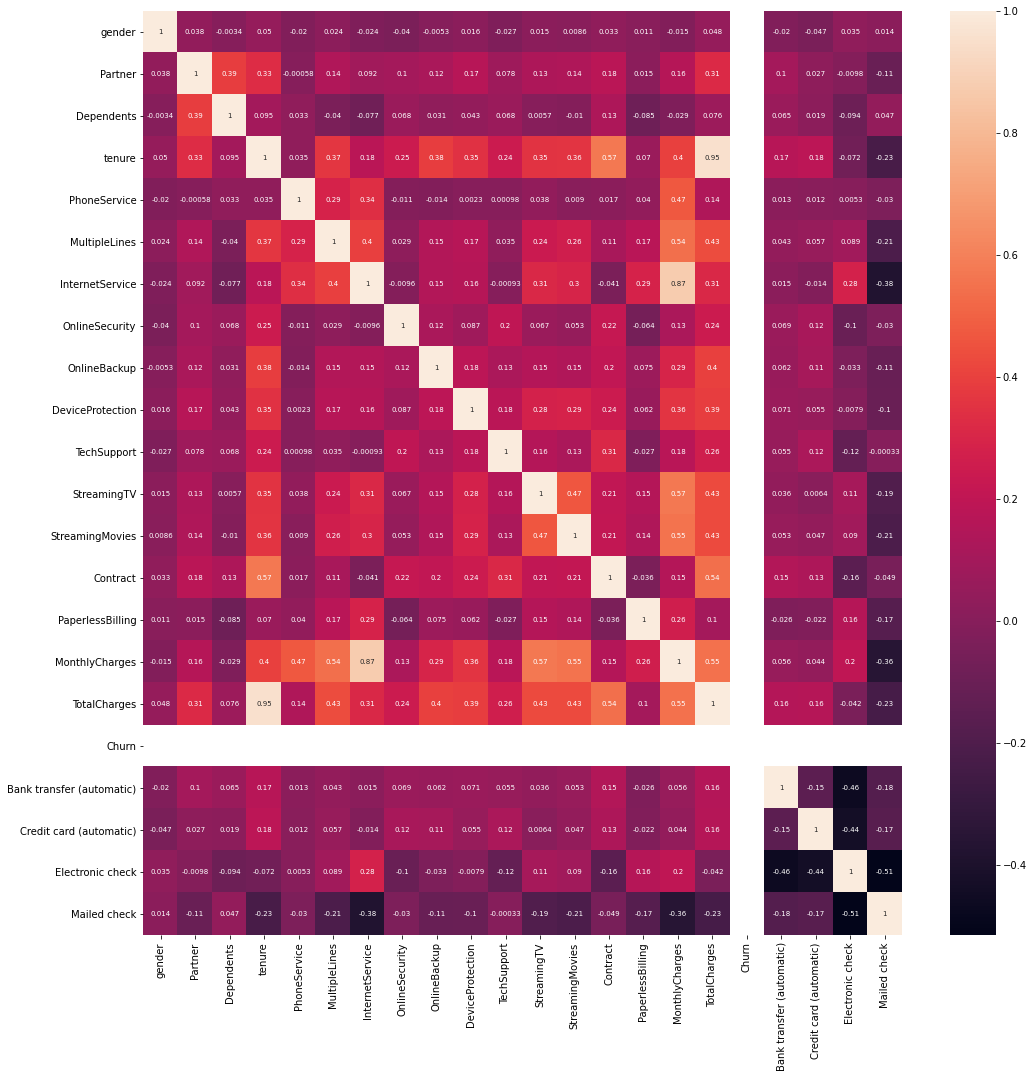

In [ ]:
#charts

#ran heatmap to check for variable correlations for churn_yes
fig, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(churn_yes.corr(), annot=True, annot_kws={"size": 7})

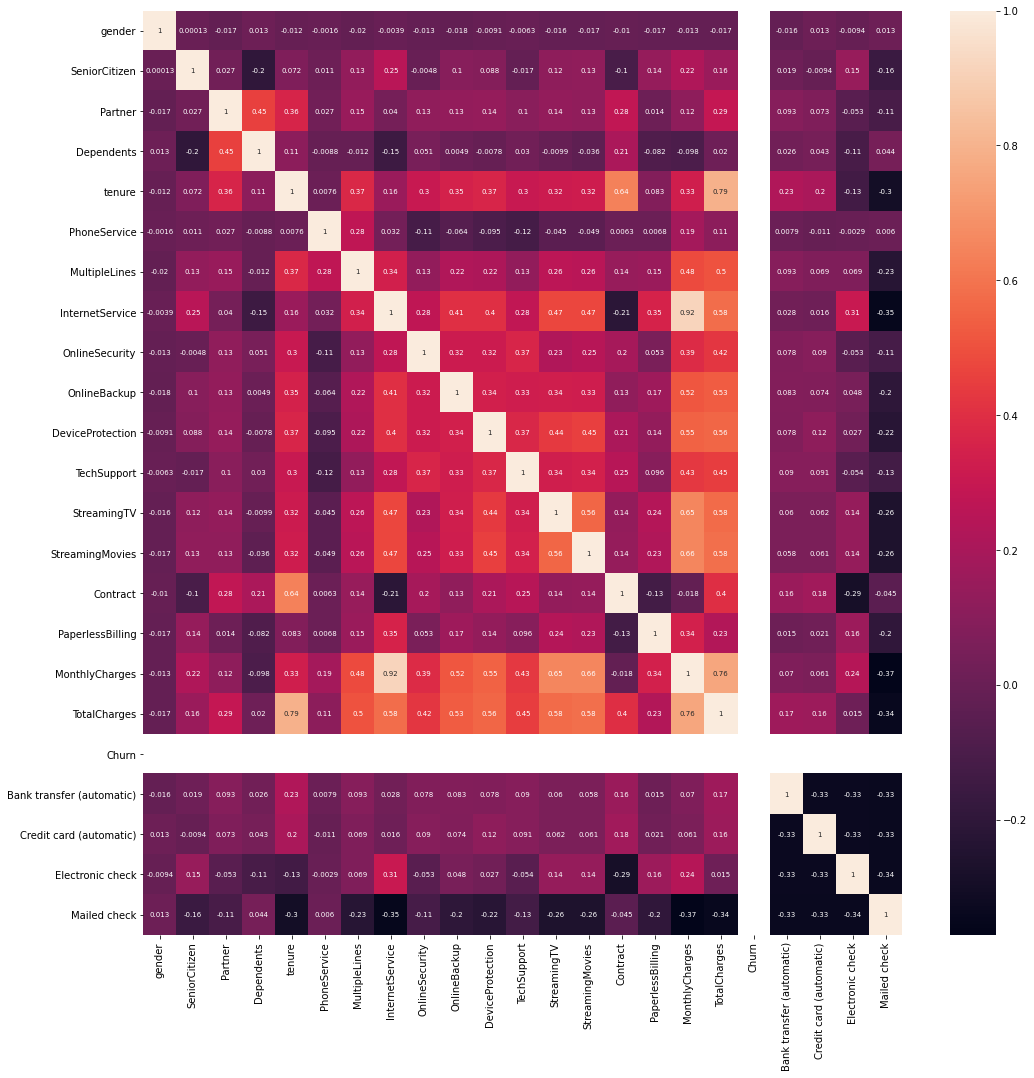

In [ ]:
#heatmap to check for variable correlations.
fig, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(churn_no.corr(), annot=True, annot_kws={"size": 7})

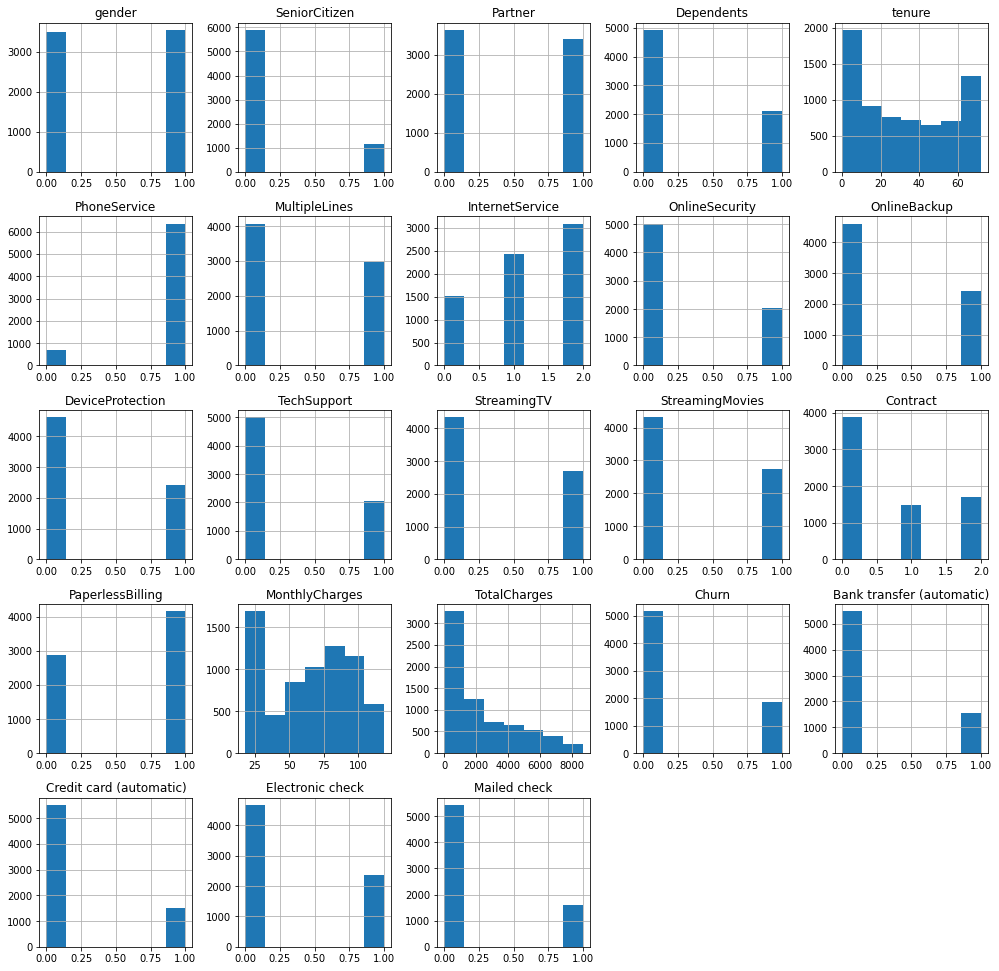

In [ ]:
#histograms of the data.
hist = churn_dum.hist(bins=7, figsize=(17, 17))

In [ ]:
#Modelling
#testing our dataset with different models:

#Naive Bayes
#Random Forest 
#Decision Tree
#K-nearest neighbors
#Ridge
#(SVC)
#Gradient Boost

#finally prepare
#Input, output and holdout to prepare the dataset for training and testing
#Training and testing applying PCA
#Training and testing applying SelectKbest
#In each phase of training and testing we will be creating a confusion matrix, 
#calculating cross validation scores to determine the accuracy for the training and testing data sets.

In [ ]:
#resample the data.
from sklearn.utils import resample

#upsample minority class.
churn_yes = resample(churn_yes,
                     replace=True,
                     n_samples=3500)

#downsample majority class.
churn_no = resample(churn_no,
                    replace=True,
                    n_samples=3500)

1    3500
0    3500
Name: Churn, dtype: int64

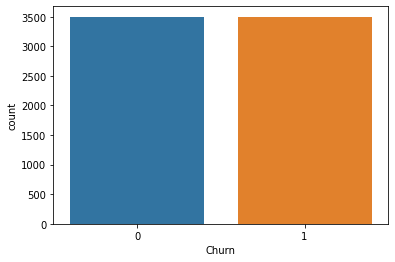

In [ ]:
#combine upsampled minority class and downsampled majority class.
churn_sampled = pd.concat([churn_yes, churn_no])

#display new class counts.
sns.countplot('Churn', data=churn_sampled)
churn_sampled.Churn.value_counts()

#unbalanced to balanced

In [ ]:
#training groups

#split data into classes and training groups.
X = churn_sampled.drop(['PaymentMethod', 'Churn'], axis=1)
y = churn_sampled.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
#Naive Bayes.
gnb = GaussianNB()
# Fit the model.
gnb.fit(X_train, y_train)
print(gnb)
y_pred_gnb = gnb.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_gnb)
# Cross-validation.
gnb_score = cross_val_score(gnb, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(gnb_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(gnb_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_gnb))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_gnb))

GaussianNB(priors=None, var_smoothing=1e-09)
Cross-Validation Scores: [0.76571429 0.73571429 0.73571429 0.76571429 0.78857143 0.74428571
 0.74714286 0.74571429 0.77428571 0.77714286]
Averaged Cross-Validation Scores: 75.80%.
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       878
           1       0.73      0.78      0.75       872

    accuracy                           0.75      1750
   macro avg       0.75      0.75      0.75      1750
weighted avg       0.75      0.75      0.75      1750

[[624 254]
 [190 682]]


In [ ]:
#KNN model.
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
# Fit the model.
knn.fit(X_train, y_train)
print(knn)
y_pred_knn = knn.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_knn)
# Cross-validation.
knn_score = cross_val_score(knn, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(knn_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(knn_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_knn))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_knn))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
Cross-Validation Scores: [0.76428571 0.75       0.77714286 0.76142857 0.78857143 0.76142857
 0.74857143 0.76285714 0.73428571 0.74714286]
Averaged Cross-Validation Scores: 75.96%.
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       878
           1       0.73      0.76      0.75       872

    accuracy                           0.74      1750
   macro avg       0.74      0.74      0.74      1750
weighted avg       0.74      0.74      0.74      1750

[[633 245]
 [207 665]]


In [ ]:
#decision tree model

dtc = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,)
# Fit the model.
dtc.fit(X_train, y_train)
print(dtc)
y_pred_dtc = dtc.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_dtc)
# Cross-validation.
dtc_score = cross_val_score(dtc, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(dtc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(dtc_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_dtc))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_dtc))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Cross-Validation Scores: [0.72142857 0.71142857 0.68285714 0.64714286 0.62142857 0.65285714
 0.65714286 0.62428571 0.71428571 0.68285714]
Averaged Cross-Validation Scores: 67.16%.
              precision    recall  f1-score   support

           0       0.69      0.45      0.55       878
           1       0.59      0.80      0.68       872

    accuracy                           0.63      1750
   macro avg       0.64      0.63      0.61      1750
weighted avg       0.64      0.63      0.61      1750

[[398 480]
 [175 697]]


In [ ]:
#Random Forest model.
rfc = RandomForestClassifier()
# Fit the model.
rfc.fit(X_train, y_train)
print(rfc)
y_pred_rfc = rfc.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_rfc)
# Cross-validation.
rfc_score = cross_val_score(rfc, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(rfc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(rfc_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_rfc))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_rfc))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Cross-Validation Scores: [0.90714286 0.90285714 0.90857143 0.92428571 0.91571429 0.93142857
 0.92428571 0.92285714 0.92428571 0.92285714]
Averaged Cross-Validation Scores: 91.84%.
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       878
           1       0.86      0.93      0.89       872

    accuracy                           0.89      1750
   macro avg       0.89      0.89      0.89      1750
w

In [ ]:
#Logistic Regression model.
lr = LogisticRegression(solver='lbfgs')
# Fit the model.
lr.fit(X_train, y_train)
print(lr)
y_pred_lr = lr.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_lr)
# Cross-validation.
lr_score = cross_val_score(lr, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(lr_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(lr_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_lr))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_lr))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Cross-Validation Scores: [0.76571429 0.75       0.73428571 0.78857143 0.78714286 0.76571429
 0.75285714 0.78       0.77857143 0.78285714]
Averaged Cross-Validation Scores: 76.86%.
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       878
           1       0.73      0.80      0.77       872

    accuracy                           0.75      1750
   macro avg       0.76      0.75      0.75      1750
weighted avg       0.76      0.75      0.75      1750

[[619 259]
 [171 701]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#SVC model.
svc = LinearSVC(max_iter=10000)
# Fit the model.
svc.fit(X_train, y_train)
print(svc)
y_pred_svc = svc.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_svc)
# Cross-validation.
svc_score = cross_val_score(svc, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(svc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(svc_score.mean()))
# Classification score.
print(classification_report(y_test, y_pred_svc))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_svc))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Cross-Validation Scores: [0.72428571 0.74571429 0.66142857 0.66285714 0.66571429 0.66142857
 0.74       0.76428571 0.68       0.77142857]
Averaged Cross-Validation Scores: 70.77%.
              precision    recall  f1-score   support

           0       0.86      0.58      0.69       878
           1       0.68      0.90      0.78       872

    accuracy                           0.74      1750
   macro avg       0.77      0.74      0.73      1750
weighted avg       0.77      0.74      0.73      1750

[[511 367]
 [ 86 786]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-Cross-Validation Scores: [0.72428571 0.74571429 0.66142857 0.66285714 0.-66571429 0.66142857
- 0.74       0.76428571 0.68       0.77142857]
-Averaged Cross-Validation Scores: 70.77%.
-              precision    recall  f1-score   support

-           0       0.86      0.58      0.69       878
-          1       0.68      0.90      0.78       872

-    accuracy                           0.74      1750
-   macro avg       0.77      0.74      0.73      1750
-weighted avg       0.77      0.74      0.73      1750

[[511 367]

[ 86 786]]

In [ ]:
#Gradient Boosting model.
gbm = ensemble.GradientBoostingClassifier()
# Fit the model.
gbm.fit(X_train, y_train)
print(gbm)
y_pred_gbm = gbm.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_gbm)
# Cross-validation.
gbm_score = cross_val_score(gbm, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(gbm_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(gbm_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_gbm))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_gbm))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Cross-Validation Scores: [0.78428571 0.77857143 0.77571429 0.81857143 0.83857143 0.79714286
 0.78142857 0.80142857 0.80142857 0.81      ]
Averaged Cross-Validation Scores: 79.87%.
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       878
           1  

In [ ]:
print('Naive Bayes Averaged Cross-Validation Scores: {:.2%}.'.format(
    gnb_score.mean()))
print('K-Nearest Neighbors Averaged Cross-Validation Scores: {:.2%}.'.format(
    knn_score.mean()))
print('Decision Tree Averaged Cross-Validation Scores: {:.2%}.'.format(
    dtc_score.mean()))
print('Random Forest Averaged Cross-Validation Scores: {:.2%}.'.format(
    rfc_score.mean()))
print('Logistic Regression Averaged Cross-Validation Scores: {:.2%}.'.format(
    lr_score.mean()))
print('Linear Support Vector Averaged Cross-Validation Score: {:.2%}.'.format(
    svc_score.mean()))
print('Gradient Boosting Averaged Cross-Validation Score: {:.2%}.'.format(
    gbm_score.mean()))

Naive Bayes Averaged Cross-Validation Scores: 75.80%.
K-Nearest Neighbors Averaged Cross-Validation Scores: 75.96%.
Decision Tree Averaged Cross-Validation Scores: 67.16%.
Random Forest Averaged Cross-Validation Scores: 91.84%.
Logistic Regression Averaged Cross-Validation Scores: 76.86%.
Linear Support Vector Averaged Cross-Validation Score: 70.77%.
Gradient Boosting Averaged Cross-Validation Score: 79.87%.


In [ ]:
#SelectKBest model.
#then import tools.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Create and fit selector
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)

X_skbest = selector.transform(X)
print(X_skbest.shape)

X.columns[selector.get_support(indices=True)].tolist()

(7000, 10)


['Dependents',
 'tenure',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'MonthlyCharges',
 'TotalCharges',
 'Credit card (automatic)',
 'Electronic check']

In [ ]:
#ran Random Forest model with SelectKBest.
rfc.fit(X_skbest, y)
y_pred_rfc = rfc.predict(X_skbest)
rfc_score_skbest = cross_val_score(rfc, X_skbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(rfc_score_skbest))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    rfc_score_skbest.mean()))

Cross-Validation Scores: [0.89285714 0.89714286 0.89857143 0.91428571 0.91       0.91714286
 0.91714286 0.91428571 0.89       0.90571429]
Averaged Cross-Validation Scores: 90.57%.


In [ ]:
#ran SVC model with SelectKBest.
svc.fit(X_skbest, y)
y_pred_svc = svc.predict(X_skbest)
svc_score_skbest = cross_val_score(svc, X_skbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(svc_score_skbest))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    svc_score_skbest.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Cross-Validation Scores: [0.73428571 0.75571429 0.60428571 0.73428571 0.74285714 0.57857143
 0.62857143 0.74       0.73       0.73714286]
Averaged Cross-Validation Scores: 69.86%.


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross-Validation Scores: [0.73428571 0.75571429 0.60428571 0.73428571 0.74285714 0.57857143
 0.62857143 0.74       0.73       0.73714286]
Averaged Cross-Validation Scores: 69.86%.


In [ ]:
# Scaling data.
sc = StandardScaler()
X = sc.fit_transform(X)

# Set up PCA.
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X)

# Resplit training sets.
X_pca_train, X_pca_test, y_train, y_test = train_test_split(
    X_pca, y)

print('Percentage of total variance explained by each component:\n',
      pca.explained_variance_ratio_)

Percentage of total variance explained by each component:
 [0.22598907 0.14690871 0.06060059 0.0561331  0.0552124  0.05183046
 0.04648779 0.04342275 0.04162258]


In [ ]:
#Naive Bayes model with PCA.
gnb_pca = GaussianNB()
# Fit the model.
gnb_pca.fit(X_pca_train, y_train)
print(gnb_pca)
y_pred_gnb = gnb_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_gnb)
# Cross-validation.
gnb_pca_score = cross_val_score(gnb_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(gnb_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    gnb_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_gnb))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_gnb))

GaussianNB(priors=None, var_smoothing=1e-09)
Cross-Validation Scores: [0.75       0.72857143 0.73       0.76       0.79       0.74857143
 0.73857143 0.74857143 0.76142857 0.77      ]
Averaged Cross-Validation Scores: 75.26%.
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       866
           1       0.74      0.76      0.75       884

    accuracy                           0.74      1750
   macro avg       0.74      0.74      0.74      1750
weighted avg       0.74      0.74      0.74      1750

[[631 235]
 [212 672]]


In [ ]:
#K-Nearest Neighbors model with PCA.
knn_pca = neighbors.KNeighborsClassifier()
# Fit the model.
knn_pca.fit(X_pca_train, y_train)
print(knn_pca)
y_pred_knn_pca = knn_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_knn_pca)
# Cross-validation.
knn_pca_score = cross_val_score(knn_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(knn_pca_score.mean()))
print('Averaged Cross-Validation Scores: {:.2%}.'.
      format(knn_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_knn_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_knn_pca))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Cross-Validation Scores: 0.7855714285714287
Averaged Cross-Validation Scores: 78.56%.
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       866
           1       0.76      0.84      0.80       884

    accuracy                           0.79      1750
   macro avg       0.79      0.79      0.79      1750
weighted avg       0.79      0.79      0.79      1750

[[635 231]
 [143 741]]


In [ ]:
#Decision Tree model with PCA.
dtc_pca = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,)

# Fit the model.
dtc_pca.fit(X_pca_train, y_train)
print(dtc_pca)
y_pred_dtc_pca = dtc_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_dtc_pca)
# Cross-validation.
dtc_pca_score = cross_val_score(dtc_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(dtc_pca_score.mean()))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    dtc_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_dtc_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_dtc_pca))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Cross-Validation Scores: 0.6698571428571428
Averaged Cross-Validation Scores: 66.99%.
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       866
           1       0.64      0.63      0.63       884

    accuracy                           0.64      1750
   macro avg       0.64      0.64      0.64      1750
weighted avg       0.64      0.64      0.64      1750

[[559 307]
 [331 553]]


In [ ]:
#Random Forest model with PCA.
rfc_pca = RandomForestClassifier()
# Fit the model.
rfc_pca.fit(X_pca_train, y_train)
print(rfc_pca)
y_pred_rfc_pca = rfc_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_rfc_pca)
# Cross-validation.
rfc_pca_score = cross_val_score(rfc_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(rfc_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    rfc_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_rfc_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_rfc_pca))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Cross-Validation Scores: [0.89142857 0.90428571 0.9        0.91714286 0.91857143 0.91142857
 0.91428571 0.92428571 0.91       0.90285714]
Averaged Cross-Validation Scores: 90.94%.
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       866
           1       0.88      0.92      0.90       884

    accuracy                           0.90      1750
   macro avg       0.90      0.90      0.90      1750
w

In [ ]:
#Logistic Regression model with PCA.
lr_pca = LogisticRegression(solver='lbfgs')
# Fit the model.
lr_pca.fit(X_pca_train, y_train)
print(lr_pca)
y_pred_lr_pca = lr_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_lr_pca)
# Cross-validation.
lr_pca_score = cross_val_score(lr_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(lr_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(lr_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_lr_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_lr_pca))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Cross-Validation Scores: [0.77142857 0.73714286 0.72857143 0.76571429 0.78714286 0.75
 0.75714286 0.75142857 0.76428571 0.76714286]
Averaged Cross-Validation Scores: 75.80%.
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       866
           1       0.75      0.78      0.76       884

    accuracy                           0.76      1750
   macro avg       0.76      0.76      0.76      1750
weighted avg       0.76      0.76      0.76      1750

[[636 230]
 [196 688]]


In [ ]:
#LinearSVC model with PCA.
svc_pca = LinearSVC(max_iter=10000)
# Fit the model.
svc_pca.fit(X_pca_train, y_train)
print(svc_pca)
y_pred_svc_pca = svc_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_svc_pca)
# Cross-validation.
svc_pca_score = cross_val_score(svc_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(svc_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    svc_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_svc_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_svc_pca))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Cross-Validation Scores: [0.77142857 0.74       0.73285714 0.77       0.78571429 0.75285714
 0.75142857 0.75428571 0.76       0.76857143]
Averaged Cross-Validation Scores: 75.87%.
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       866
           1       0.75      0.78      0.76       884

    accuracy                           0.76      1750
   macro avg       0.76      0.76      0.76      1750
weighted avg       0.76      0.76      0.76      1750

[[633 233]
 [193 691]]


In [ ]:
#Gradient Boosting model with PCA.
gbc_pca = ensemble.GradientBoostingClassifier()
# Fit the model.
gbc_pca.fit(X_pca_train, y_train)
print(gbc_pca)
y_pred_gbc_pca = gbc_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_gbc_pca)
# Cross-validation.
gbc_pca_score = cross_val_score(gbc_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(gbc_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    gbc_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_gbc_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_gbc_pca))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Cross-Validation Scores: [0.79       0.74285714 0.76285714 0.80142857 0.81142857 0.78142857
 0.78142857 0.78714286 0.79714286 0.78428571]
Averaged Cross-Validation Scores: 78.40%.
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       866
           1  

In [ ]:
print('Naive Bayes PCA Averaged Cross-Validation Scores: {:.2%}.'.format(
    gnb_pca_score.mean()))
print('K-Nearest Neighbors PCA Averaged Cross-Validation Scores: {:.2%}.'
      .format(knn_pca_score.mean()))
print('Decision Tree PCA Averaged Cross-Validation Scores: {:.2%}.'.format(
    dtc_pca_score.mean()))
print('Random Forest PCA Averaged Cross-Validation Scores: {:.2%}.'.format(
    rfc_pca_score.mean()))
print('Logistic Regression PCA Averaged Cross-Validation Scores: {:.2%}.'
      .format(lr_pca_score.mean()))
print('Linear Support Vector PCA Averaged Cross-Validation Score: {:.2%}.'
      .format(svc_pca_score.mean()))
print('Gradient Boosting PCA Averaged Cross-Validation Score: {:.2%}.'.format(
    gbc_pca_score.mean()))

Naive Bayes PCA Averaged Cross-Validation Scores: 75.26%.
K-Nearest Neighbors PCA Averaged Cross-Validation Scores: 78.56%.
Decision Tree PCA Averaged Cross-Validation Scores: 66.99%.
Random Forest PCA Averaged Cross-Validation Scores: 90.94%.
Logistic Regression PCA Averaged Cross-Validation Scores: 75.80%.
Linear Support Vector PCA Averaged Cross-Validation Score: 75.87%.
Gradient Boosting PCA Averaged Cross-Validation Score: 78.40%.


random forest model was the best performing model.



These results are an important tool when that could help us decide into which clients we should focus our resources to try to avoid them leaving, and thus saving time and funds.